<a href="https://colab.research.google.com/github/rex66-7033/ITEC3030A1/blob/main/Copy_of_Starter_Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Business Scenario
In this task, we will do some data analysis using both SQL and Python. The goal is to generate a report for our client company, telling them the performance metrics of our AI model。 The performance metrics we want to know are TRUE POSITIVE rate, FALSE POSITIVE rate and FALSE NEGATIVE rate. Please do some research and make sure you fully understand these terms. We will calculate the above metrics on a daily basis, and eventually we need to generate a graph helping the client to visualize the how the metrics changing by time. 

## Connect to Mongo DB
The first thing we need to do is create a Mongo Atalas account and download the Mongo Compass. After that, you can upload the label metadata JSON file to Mongo DB. Also, please do some research and make sure you understand the concept of JSON file and NoSQL. Once you have imported the data into Mongo DB, you can connect your database to Python by the following code. 

In [ ]:
# Install the required modules
!pip install pymongo
!pip install dnspython==2.0

     |████████████████████████████████| 215kB 6.8MB/s 


In [ ]:
# Import required modules
from pymongo import MongoClient
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
# Connect to MongoDB Atlas
client = MongoClient(### Your url at here ###)

# Choose which database you want to connect
mydb = client[### Your database ###]

# Choose which collection in the database you want to connect
mycol = mydb[### Your collection ###]

# Fetch all the documents from collection
label_meta = list(mycol.find())

In [ ]:
print('The total number of documents is:', len(label_meta))

The total number of documents is: 689342


## Query the Company (Organization) Which Owns the Most Projects
We want to generate a report for our important client, the company who have done the most projects with us. In this case, you need to write a query in PostgreSQL to find which company has the most number of projects. Please record the organization id in the following cell. (Hint: you need to use COUNT and GROUP BY functions in SQL)

In [ ]:
big_org = ### Your answer

## Further Query
After we know which company has the most number of projects, we want to filter their data from the LABEL table in PostgreSQL. However, the LABEL table does not contain any information about organization, so we need to incorporate with another table to finish our query. Here you need to apply JOIN function if SQL. Note that JOIN is a very important function in SQL, please make sure you understand all type of JOIN in SQL. The query has the following criteria:
<br />
1. Fetch all columns from the LABEL table <br />
2. Filter the project_id column, we only want to fetch rows which project_id are belong to big_org. <br />
3. Filter the is_seed column, we only want is_seed to be false. <br />
4. Filter the type column, we only want to analyze image data for this report. If you want more practice, you can also do the text data analysis later and compare it with image data.  <br />
5. Convert the timestamp of create_date and update_date to readable date like 2020-01-01. (Hint: you may get a date time like 2020-01-01 15:36:22-04 first, please search some way to get rid of the time and timezone) <br />
6. Order the results by create_date in ASCENDING order. <br />
7. Once you fetch the results, please export the result to CSV file and upload it to Google Colab. 

Note: you can finish the above task in ONE query. If you are able to finish this query, you are having a good understanding of SQL then. You may expect to spend more time on this one. 

## Read the resulting CSV file in Python
Use Python Pandas to read the csv

In [ ]:
# Read the csv file 
df_bigorg = ### Your code to read csv by pandas

In [ ]:
# Preview of the df_bigorg
df_bigorg.head()

,label_id,project_id,asset_id,type,is_seed,create_date,update_date,is_included_in_training_data,label_time,approved_by,model_version,is_changed
0,fd3769d6-5f74-4dd0-9ee9-4d04fe89d628,b40d3027-c398-4b5f-a861-6586e89a2d01,a99dc8f5-c2c3-42c8-9c6e-be58bcf5b0f3,image,False,2020-07-05,2020-07-05,True,17.684482,ef7eac18-6221-4301-b83c-9b58904f6cfb,1,True
1,81c74bec-0e4c-4258-b3ee-733dd812b5fe,9571bb51-7f8f-449a-91a7-2c6328297229,66a178f9-accb-4536-aeb6-aa689f547b0f,image,False,2020-07-05,2020-07-05,True,4.776199,ef7eac18-6221-4301-b83c-9b58904f6cfb,1,False
2,9d32afc4-52b9-469e-a5a0-3c0ff19a5288,b15a0999-c6d9-4cae-9bc9-6a2072c2c531,f6d31a67-7b95-4825-8eb9-5db1b83c668d,image,False,2020-07-05,2020-07-05,True,18.480190,ef7eac18-6221-4301-b83c-9b58904f6cfb,1,True
3,cabacb4f-9bcb-45f7-9417-61929705a14c,016f0952-9426-4963-8ced-a394c3389e87,e6f55e80-ccfe-41a5-ac3f-63c55cc1b3f2,image,False,2020-07-05,2020-07-06,True,5.877106,9c1be7df-4df8-4774-9b3b-7a5e39d1f51c,1,False
4,bfaacc3c-fe49-4b9d-9630-74bcc7a11a67,686b44eb-d504-4b5d-9c1a-ff0b88bdd09e,7fa36589-c0e8-451d-8ea4-5a501d788151,image,False,2020-07-05,2020-07-06,True,5.561129,ef7eac18-6221-4301-b83c-9b58904f6cfb,1,False


## Filter the Metadata from Mongo DB by label_id
We have about 700,000 documents in the collection, apparently we don't want them all. We only want to filter out the documents which have label_id in the df_birorg column. The following code will do this task. 

In [ ]:
# Convert the label_id column of df_bigorg to a numpy array
label_ids = ### Your code here

In [ ]:
# Filter the metadata in Mongo DB
metadata = list(mycol.find( { "label_id": { "$in": list(label_ids) } } ))

In [ ]:
# Preview of the metadata
metadata[0]

{'_id': ObjectId('60ce6fea86fbfb52bcd97905'),
 'key': 0,
 'label_id': 'c0c6bde7-635c-4323-891c-dbc13aef2745',
 'metadata': {'annotated_by': '8b06673f-b1b5-4a59-b3eb-b6f1ee1b4181',
  'bounding_data': {'class_name': 'skateboard',
   'height': 0.823118033,
   'width': 0.6169070912,
   'x': 0.6905071447,
   'y': 0.2871237606},
  'box_create_date': 1594033198301,
  'box_update_date': 1594033208301,
  'label_create_date': 1594033198301}}

In [ ]:
### Get the length of metadata
total = ### Your code
print('The total number of documents we have right now is: ',total)

The total number of documents we have right now is:  21190


## Calculate the Total True Positive, False Positive and False Negative
After we filter out the metadata, we can calculate the metrics based on that. 
The logic is as following: <br />
1. If annotated_by is model, then this label box is drawn by the model directly and no one had changed that later, so it's a true positive. <br />
2. If annotated_by is not model, then this label box is changed or created by someone. If the box_create_date is greater than label_create_date, then it means the box is created after the initial labelling (by model). In this case, someone added the label box and it's a False Negative. 
3. If the box_update_date is greater than the box_create_date, then it means the box is changed after the initial labelling (by model). In this case, someone changed the label box and it's a False Positive. <br />

Please write a FOR loop to calculate the total number of TP, FP, FN and calculate their respective rate (divided by total). 



In [ ]:
### Your code here

In [ ]:
tp_rate = ### Your code
fp_rate = ### Your code
fn_rate = ### Your code
print('The TP rate is:', tp_rate)
print('The FP rate is:', fp_rate)
print('The FN rate is:', fn_rate)

The TP rate is: 0.761208117036338
The FP rate is: 0.19329872581406324
The FN rate is: 0.04549315714959887


## Calculate the Daily Metrics
Now we have the total performance metrics, then we want to calculate them at a daily basis. To do that, we need to slice the df_bigorg by create_date. If you understand what's happening in the above codes, you should be able to write a FOR loop and Python function to get all the daily metrics. (Make sure you understand how Python function works).  

In [ ]:
### Your code here

## Visualize the Result
After we calculate all the daily metrics, we need to use matplotlib to visualize the results. You need to make 3 plots, each for TP, FP and FN. Make sure you give your plots proper title and axis labels. 

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16],
 <a list of 17 Text major ticklabel objects>)

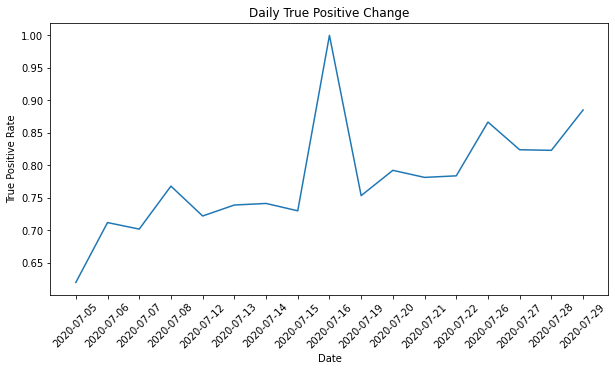

In [ ]:
# TP
### Your code

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16],
 <a list of 17 Text major ticklabel objects>)

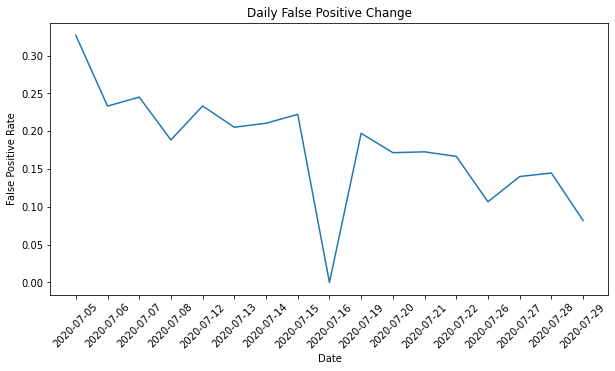

In [ ]:
# FP
### Your code

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16],
 <a list of 17 Text major ticklabel objects>)

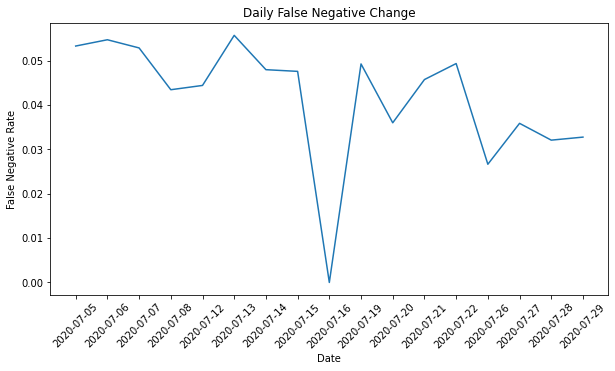

In [ ]:
# FN
### Your code

## Description
Please qualitatively describe what the plots are telling. Is there any trends, please describe. If there is any outliers, please explore why there are outliers. 

In [ ]:
### Your code